In [1]:
import pandas as pd
from exosyspop.populations import TRILEGAL_BGBinaryPopulation

targets = pd.read_hdf('targets.h5')
bgstars = pd.read_hdf('bgstars.h5').query('m_ini > 0.11')

# Sanitize dtypes of targets DataFrame
for c in targets.columns:
    if targets[c].dtype == object:
        targets.loc[:,c] = targets.loc[:,c].astype(str)

pop = TRILEGAL_BGBinaryPopulation(targets, bgstars)

import logging
rootLogger = logging.getLogger()

In [2]:
pop = TRILEGAL_BGBinaryPopulation(targets.sample(1000), bgstars.sample(1000), fB=1)

In [3]:
rB = pop.radius_B

BGEB: dmag regressor trained, R2=0.911817563285
BGEB: qR regressor trained, R2=0.76634227607


In [4]:
rootLogger.setLevel(logging.INFO)
pop._train_trap(N=200);
rootLogger.setLevel(logging.DEBUG)

BGEB: Depth trained: R2=0.997155648551
BGEB: Duration trained: R2=0.992380949106
BGEB: Slope trained: R2=0.989042134265


In [5]:
obs = pop.observe(regr_trap=True)

In [6]:
pop.save('test', overwrite=True)

In [7]:
import cPickle as pickle
pickle.dump(pop, open('test.pkl', 'wb'))

In [8]:
pop = pickle.load(open('test.pkl', 'rb'))

In [9]:
print(pop.params['fB'])
pop._generate_binaries()
pop.params['fB']

DEBUG:root:Setting params {}.
DEBUG:root:old params = None
DEBUG:root:Generating binary companions for 863 stars...


1


1

In [10]:
pop.radius_B[:10]

array([   0.15716966,    0.22931597,    0.14225803,  119.05026062,
          0.44244812,    0.23416311,    0.31517727,    0.55514619,
          0.49646648,    0.39489863])

In [11]:
rB[:10]

array([   0.14651767,    0.20932919,    0.22894365,  115.90336165,
          0.49478899,    0.18239524,    0.28059119,    0.31287778,
          0.67566143,    0.53647009])

BGEB: dmag regressor trained, R2=0.975228863924
BGEB: qR regressor trained, R2=0.908807218686
BGEB: Depth trained: R2=0.999520898496
BGEB: Duration trained: R2=0.997345061377
BGEB: Slope trained: R2=0.992131678434


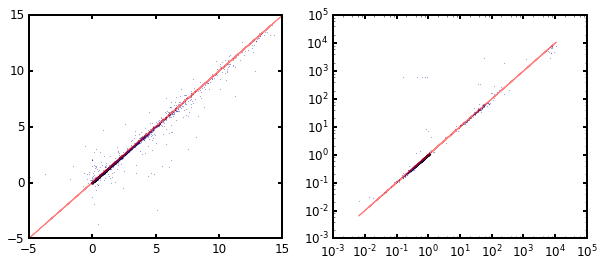

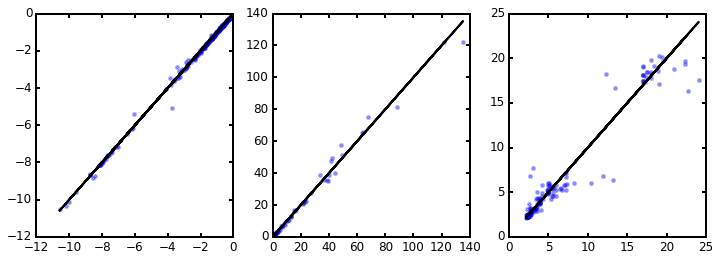

In [2]:
%matplotlib inline
rootLogger.setLevel(logging.INFO)
pop._train_pipelines(n_jobs=8, plot=True)
pop._train_trap(N=1000, plot=True);

In [4]:
from copy import deepcopy

pop2 = deepcopy(pop)

In [5]:
pop._generate_binaries()
pop2._generate_binaries(use_ic=True)

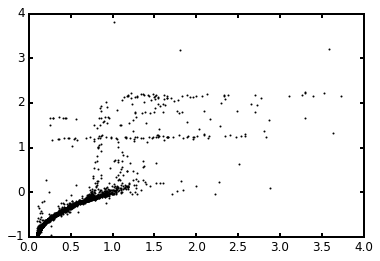

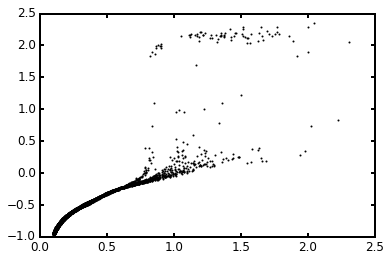

In [8]:
import matplotlib.pyplot as plt
import numpy as np

ok = np.isfinite(pop.stars.radius_B)
plt.plot(pop.stars.mass_B[ok], np.log10(pop.stars.radius_B[ok]), 'o', ms=1, mew=1)
ok = np.isfinite(pop2.stars.radius_B)
plt.figure()
plt.plot(pop2.stars.mass_B[ok], np.log10(pop2.stars.radius_B[ok]), 'o', ms=1, mew=1)


In [7]:
pop.stars.query('radius_B == -100')[['mass_A', 'radius_A', 'mass_B', 'radius_B']]

,mass_A,radius_A,mass_B,radius_B
1536,0.15215,0.195592,0.115682,-100
150565,0.11577,0.130621,0.099075,-100
2268,2.21863,4.200070,1.958928,-100
3434,4.15192,0.022123,3.452282,-100
113358,0.17211,0.181810,0.099116,-100
140075,0.12470,0.137609,0.099162,-100
62600,0.82567,0.780939,0.099180,-100
171448,0.11797,0.129300,0.099207,-100
169170,0.83517,0.020049,0.830359,-100
172439,0.83641,0.017556,0.332649,-100


In [3]:
obs_pop = pop.get_N_observed(N=5000, new_orbits=True, query='T14_pri < 2 or T14_sec < 2')

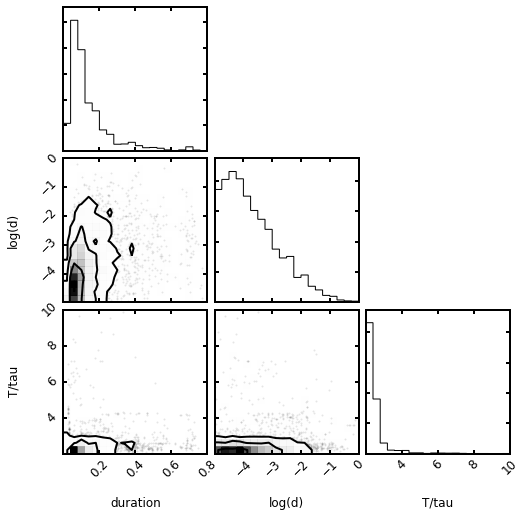

In [4]:
obs_pop.trap_corner(range=[(0,0.8), (-5,0), (2,10)]);

In [5]:
pop.save('bgpop', overwrite=True)

In [6]:
pop = TRILEGAL_BGBinaryPopulation.load('bgpop')

In [7]:
obs = pop.observe(regr_trap=True)

In [9]:
rootLogger.setLevel(logging.INFO)
%timeit pop.observe(new=True, use_ic=True, regr_trap=True)

1 loops, best of 3: 805 ms per loop


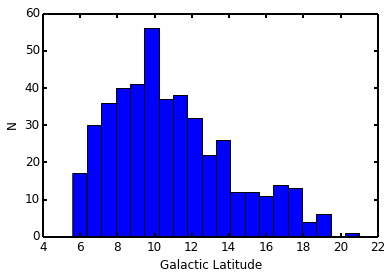

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
obs = pop.observe(new=True)
plt.hist(obs.b_target.values, bins=20);
plt.xlabel('Galactic Latitude')
plt.ylabel('N');